In [1]:
print("test")

[1] "test"


In [ ]:
library(tidyverse)
library(repr)
library(RColorBrewer)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”


In [1]:
set.seed(19)

#loading data -> from Ksenia's notebook
pulsar_data <- read_csv("https://github.com/kseniak1/DSCI100-Group-Project/raw/main/HTRU_2%5B1%5D.csv", col_names = FALSE) %>%
                rename(mean_ip = X1,
                      dev_ip = X2,
                      excess_ip = X3,
                      skewness_ip = X4,
                      mean_dm = X5,
                      dev_dm = X6,
                      excess_dm = X7,
                      skewness_dm = X8,
                      class = X9) %>%
                mutate(class = as.factor(class))

#reduce data
reduced_pulsar <- pulsar_data  %>%
    
    sample_n(500)

#split data
pulsar_split <- initial_split(reduced_pulsar, prop = 0.75, strata = class) 
pulsar_training <- training(pulsar_split) 
pulsar_testing <- testing(pulsar_split)

#model specs
knn_spec <- nearest_neighbor(weight = 'rectangular', neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#generic recipe
recipe_n <- recipe(class ~., data = pulsar_training) %>%
    step_upsample(class, over_ratio = 1, skip = FALSE) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#vfold
vfold <- vfold_cv(pulsar_training, v = 5, strata = class)

#k values
k_values <- tibble(neighbors = seq(from = 1, to = 30))

#generic workflow

fit_n <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_n) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot
#used template from worksheet classification 2 question 4.2

plot_n <- ggplot(fit_n, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 10, by = 1))


#selecting highest accuracy:
highest_n <- fit_n %>%
    arrange(mean) %>%
    slice(1) %>%
    select(mean) %>%
    rename(n = mean) 
highest_n

ERROR: Error in read_csv("https://github.com/kseniak1/DSCI100-Group-Project/raw/main/HTRU_2%5B1%5D.csv", : could not find function "%>%"


In [16]:
set.seed(19)
#1: Mean and standard dev (I)

#generic recipe
recipe_1 <- recipe(class ~ mean_ip + dev_ip, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_1 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_1) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot
options(repr.plot.width = 10, repr.plot.height = 5)

plot_1 <- ggplot(fit_1, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Mean and standard dev (I)") +
       scale_x_continuous(breaks = seq(0, 30, by = 2))

highest_1 <- fit_1 %>%
    arrange(desc(mean)) %>%
    slice(1) %>%
    select(mean) %>%
    rename("1" = mean) 
highest_1

1
<dbl>
0.8906828


In [17]:
set.seed(19)
#2: Mean and skewness (I)

#generic recipe
recipe_2 <- recipe(class ~ mean_ip + skewness_ip, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_2 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_2) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot

options(repr.plot.width = 10, repr.plot.height = 5)

plot_2 <- ggplot(fit_2, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Mean and skewness (I)") +
       scale_x_continuous(breaks = seq(0, 30, by = 2))

highest_2 <- fit_2 %>%
    arrange(desc(mean)) %>%
    slice(1) %>%
    select(mean) %>%
    rename("2" = mean) 
highest_2

2
<dbl>
0.8881935


In [18]:
set.seed(19)
#3: Mean and excess kurtosis (I)

#generic recipe
recipe_3 <- recipe(class ~ mean_ip + excess_ip, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_3 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_3) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot

plot_3 <- ggplot(fit_3, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title ="Mean and excess kurtosis (I)") +
       scale_x_continuous(breaks = seq(0, 30, by = 2))

highest_3 <- fit_3 %>%
    arrange(desc(mean)) %>%
    slice(1) %>%
    select(mean) %>%
    rename("3" = mean) 
highest_3

3
<dbl>
0.920128


In [19]:
set.seed(19)
#4: Mean and standard dev (D)

#generic recipe
recipe_4 <- recipe(class ~ mean_dm + dev_dm, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_4 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_4) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot
options(repr.plot.width = 10, repr.plot.height = 5)

plot_4 <- ggplot(fit_4, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Mean and standard dev (D)") +
       scale_x_continuous(breaks = seq(0, 30, by = 2))

highest_4 <- fit_4 %>%
    arrange(desc(mean)) %>%
    slice(1) %>%
    select(mean) %>%
    rename("4" = mean) 
highest_4

4
<dbl>
0.85633


In [25]:
set.seed(19)
#5: Mean and skewness (D)

#generic recipe
recipe_5 <- recipe(class ~ mean_dm + skewness_dm, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_5 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_5) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot
options(repr.plot.width = 10, repr.plot.height = 5)

plot_5 <- ggplot(fit_5, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Mean and skewness (D)") +
       scale_x_continuous(breaks = seq(0, 30, by = 2))

highest_5 <- fit_5 %>%
    arrange(desc(mean)) %>%
    slice(1) %>%
    select(mean) %>%
    rename("5" = mean)
highest_5

5
<dbl>
0.8536984


In [26]:
set.seed(19)
#6: Mean and excess kurtosis (D)

#generic recipe
recipe_6 <- recipe(class ~ mean_dm + excess_dm, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_6 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_6) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot
options(repr.plot.width = 10, repr.plot.height = 5)

plot_6 <- ggplot(fit_6, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Mean and excess kurtosis (D)") +
       scale_x_continuous(breaks = seq(0, 30, by = 2))

highest_6 <- fit_6 %>%
    arrange(desc(mean)) %>%
    slice(1) %>%
    select(mean) %>%
    rename("6" = mean) 
highest_6

6
<dbl>
0.8486486


In [28]:
highest_averages <- bind_cols(highest_1, highest_2, highest_3, highest_4, highest_5, highest_6)
highest_averages

#3 (mean and excess kurtosis (I)) has the highest average
#this average is for k = 3:4, 7:12
#figure out which k to use

best_k <- fit_3 %>%
    arrange(desc(mean)) %>%
    slice(1) %>%
    select(neighbors) %>%
    pull()
best_k

1,2,3,4,5,6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8906828,0.8881935,0.920128,0.85633,0.8536984,0.8486486


[1] 7

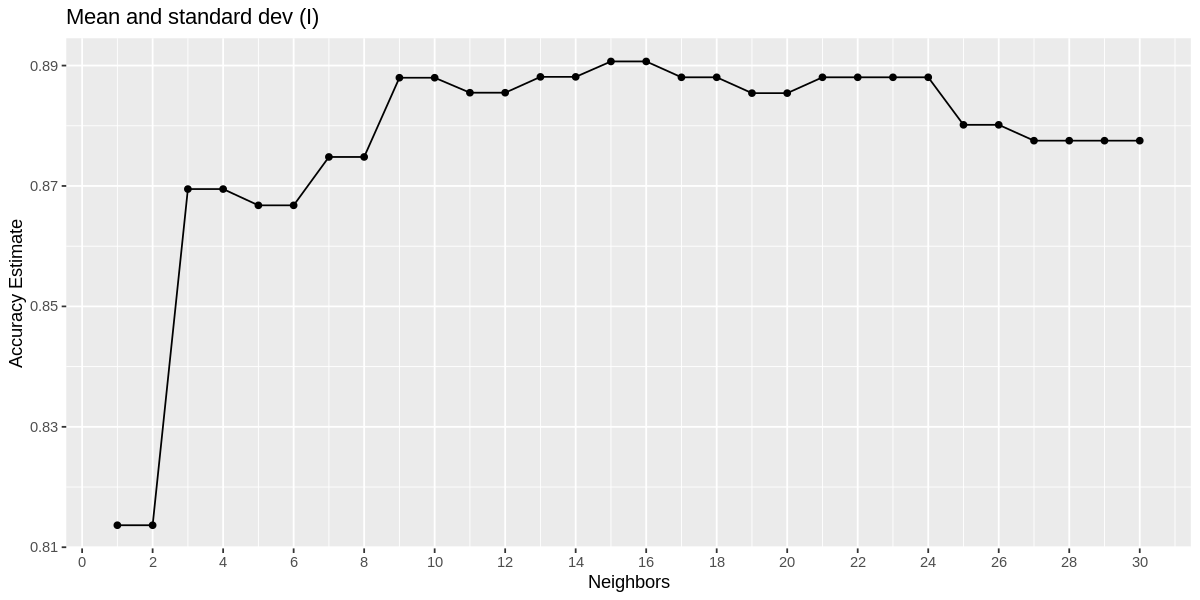

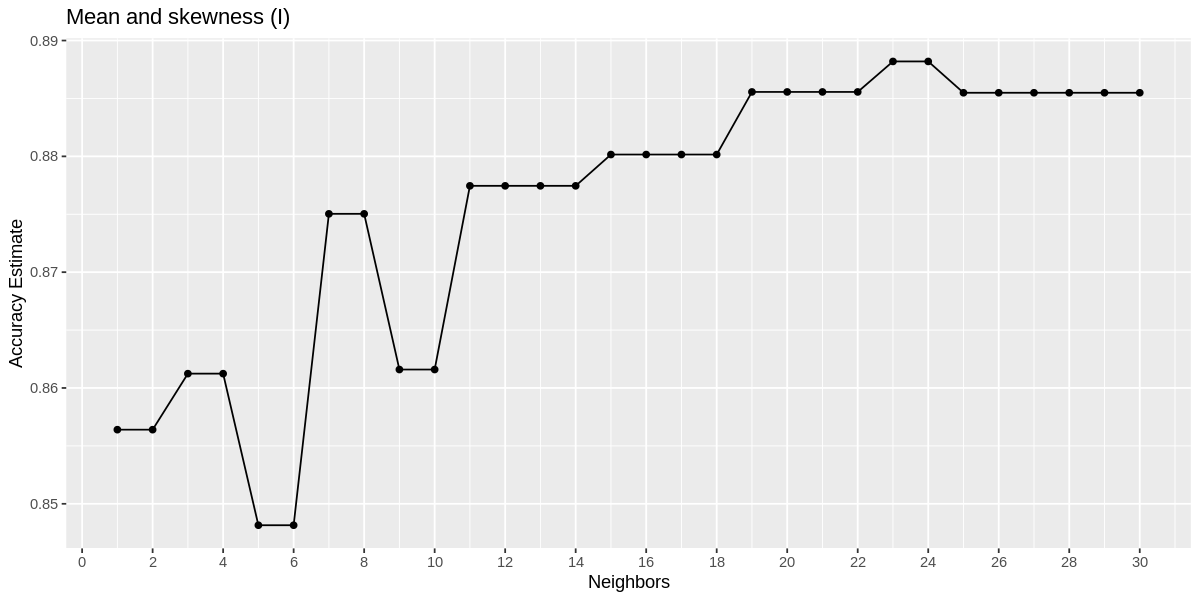

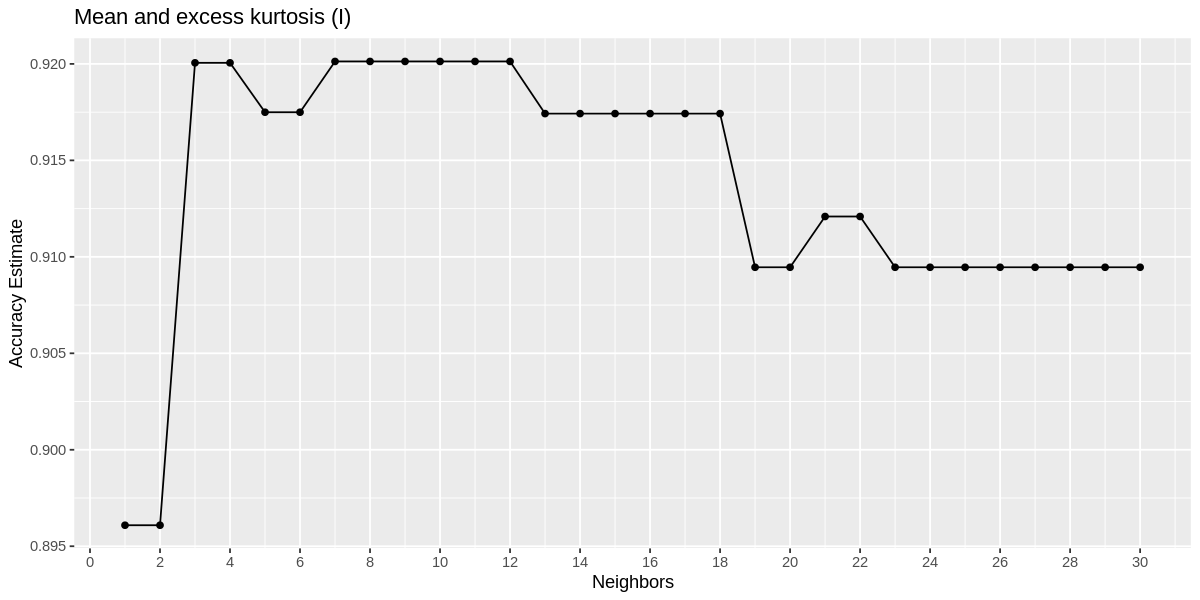

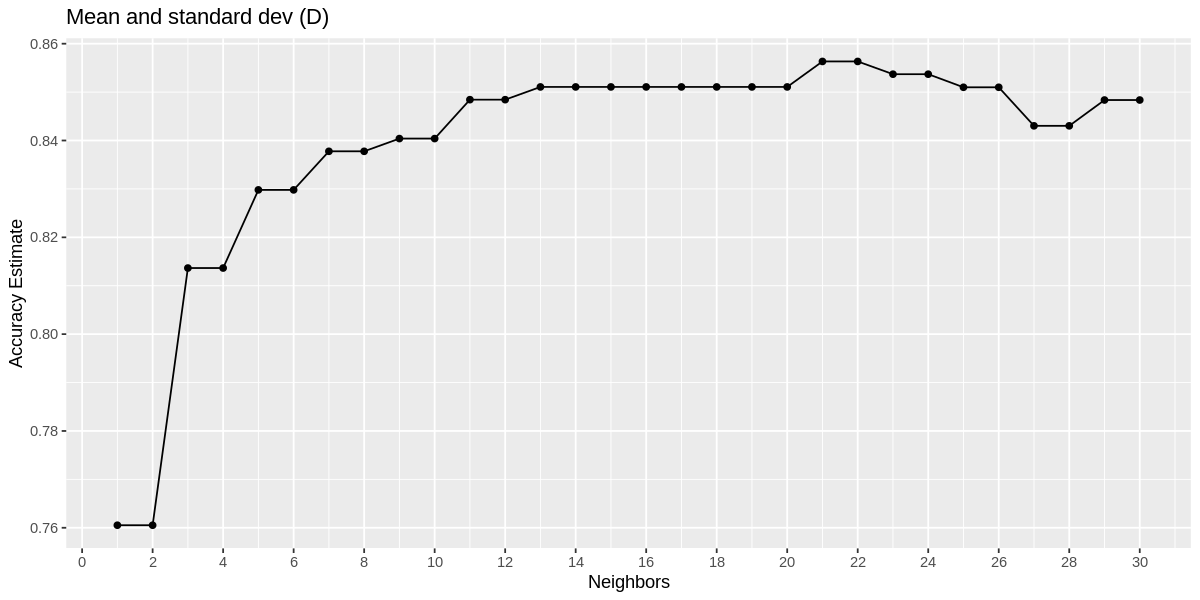

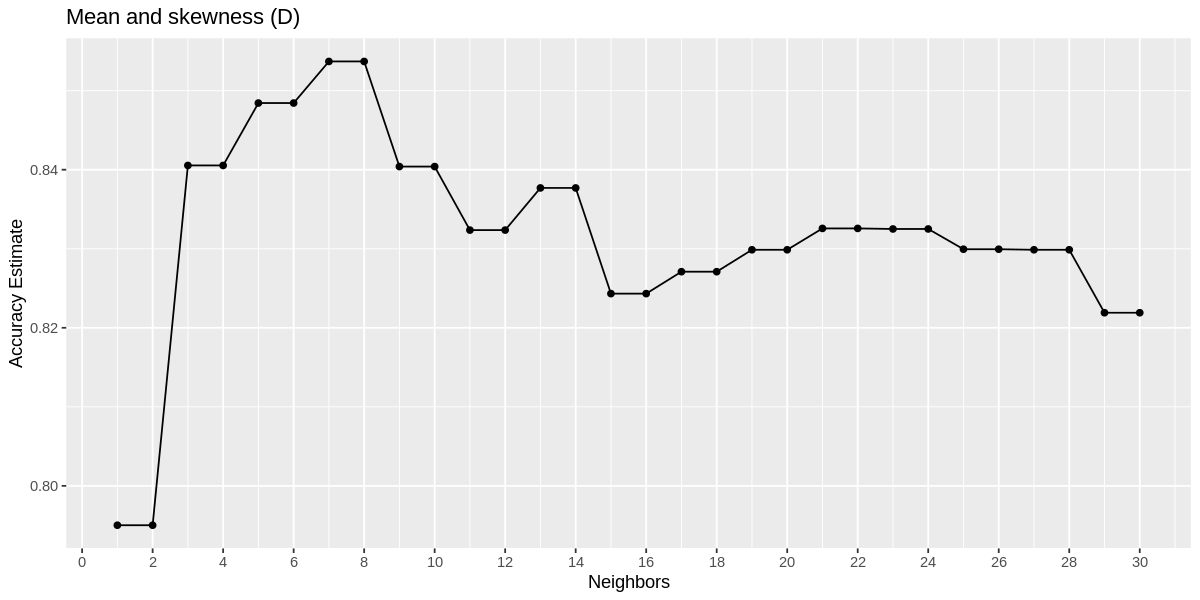

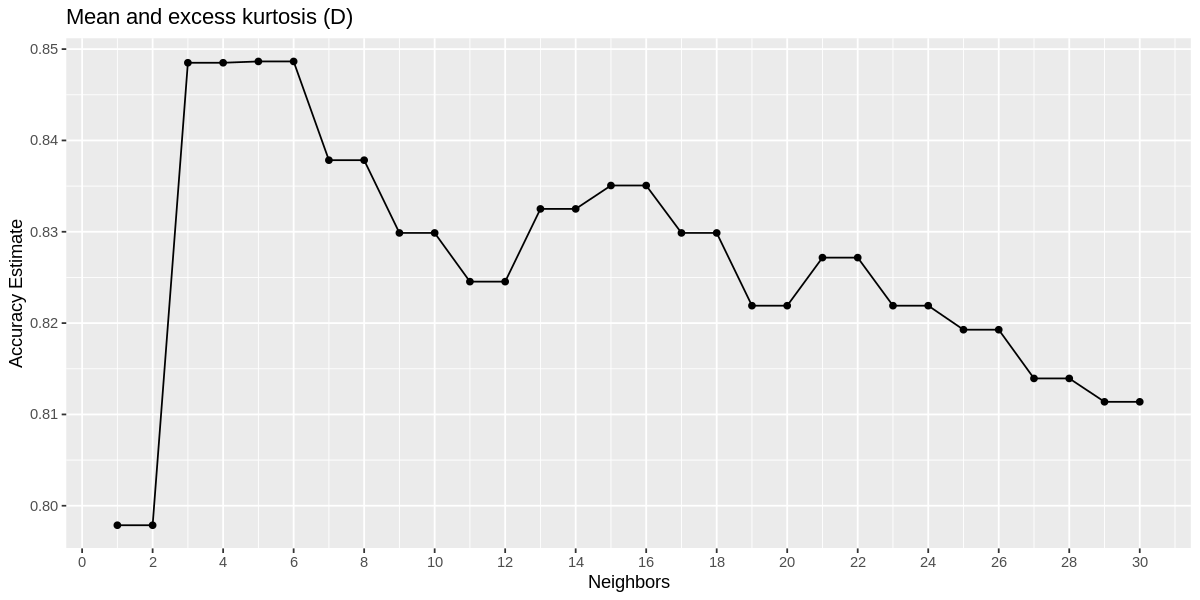

In [12]:
plot_1 
plot_2 
plot_3 
plot_4 
plot_5 
plot_6

In [41]:
#final workflow
set.seed(19)

best_knn_spec <- nearest_neighbor(weight = 'rectangular', neighbors = best_k) %>%
       set_engine("kknn") %>%  
       set_mode("classification")

best_recipe <- recipe(class ~ mean_ip + excess_ip, data = reduced_pulsar) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 

pulsar_fit <- workflow() %>%
    add_recipe(best_recipe) %>%                              
    add_model(best_knn_spec) %>%
    fit(data = reduced_pulsar)                              
                                  
test_prediction <- predict(pulsar_fit, pulsar_testing) %>%
    bind_cols(pulsar_testing) 

test_prediction_metrics <- test_prediction %>%
    metrics(truth = class, estimate = .pred_class)
test_prediction_metrics

test_prediction_matrix <- test_prediction %>%
    conf_mat(truth = class, estimate = .pred_class)
test_prediction_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9760000
kap,binary,0.8443337


          Truth
Prediction   0   1
         0 113   3
         1   0   9